# **Dicoding Indonesia : Module Data Analysis with Python**

## **Proyek Analisis Data: Bike Sharing**

- Nama : Adlan Muamamr Shiddiq
- Email : adlanmuammar9@gmail.com
- Id Dicoding : adlanmuammarshiddiq

### **Content**
1. Latar Belakang
2. Data Understanding
3. Data Wrangling
4. Exploratory Data Analysis (EDA)
5. Visualization & Explanatory Analysis
6. Conclusion & Recommendation

---

## **Pernyataan Masalah**

1. Berapa banyak total penyewa sepedah berdasarkan musimnya ? 
2. Bagaimana pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda ?
3. Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian?
4. Bagaimana peningkatan penyewaan sepeda dalam rentang waktu per 1 tahun ? 

## **Load Library**

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import normaltest
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

Setelah kita mengimport library yang kita perlukan untuk tahapan analisa data kita perlu melakukan tahapan Data Understanding dengan tujuan untuk memahami dataset yang kita punya secara lebih mendalam.

## **Data Understanding**

Sistem berbagi sepeda adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian sepeda menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya di posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran penting mereka dalam masalah lalu lintas, lingkungan dan kesehatan.

Terlepas dari aplikasi dunia nyata yang menarik dari sistem berbagi sepeda, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan secara eksplisit dicatat dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi jaringan sensor virtual yang dapat digunakan untuk merasakan mobilitas di kota. Dengan demikian, diharapkan sebagian besar kejadian penting di kota dapat dideteksi melalui pemantauan data ini.

### *Attribute of Affirmation*

| Attribute | Data Type | Description |
| --- | --- | --- |
| instant | Text | indeks catatan |
| dteday | Object | Tanggal,Tahun,Bulan dari Penyewaan Sepeda |
| season | Integer | musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin) |
| yr | Integer | Tahun (0: 2011, 1: 2012) |
| mnth | Integer | Bulan (1 sampai 12) |
| hr | Integer | Jam (0 hingga 23) |
| holiday | Integer | Hari cuaca hari libur atau tidak (diambil dari [Tautan Web]) |
| weekday | Integer | Hari dalam seminggu |
| workingday | Integer | Jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka nilainya 0. |
| weathersit | Integer | 1 : Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian. 2 : Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut. 3 : Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan.|
| temp | Float | Suhu yang dinormalisasi dalam Celcius. Nilai diperoleh melalui (t-t_min)/(t_max-t_min), t_min = -8, t_max = +39 (hanya dalam skala per jam) |
| atemp | Float | Suhu perasaan yang dinormalisasi dalam Celcius. Nilai-nilai ini diperoleh melalui (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hanya dalam skala per jam) |
| hum | Float | Kelembapan yang dinormalisasi. Nilai dibagi menjadi 100 (maksimum) |
| windspeed | Float | Kecepatan angin yang dinormalisasi. Nilai dibagi menjadi 67 (maks) |
| casual | Integer | Jumlah pengguna biasa |
| registered | Integer | Jumlah pengguna terdaftar |
| cnt | Integer | Jumlah total sepeda sewaan termasuk yang kasual dan terdaftar |

Setelah kita melakukan tahapan pemahaman terhadap dataset yang kita miliki,kita akan melanjutkan tahapan berikutnya yaitu tahapan Data Wrangling

## **Data Wrangling**

Tahapan yang pertama kali dilakukan dalam *Data Wrangling* adalah *Gathering Data* atau proses pengumpulan data. Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.

### **Gathering Data**

In [218]:
df = pd.read_csv('day.csv')
display(df.head(),df.tail())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


### **Assesing Data**

Setelah semua data yang dibutuhkan terkumpul, proses selanjutnya ialah penilaian terhadap data tersebut. Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

In [219]:
print("Jumlah baris di DataFrame day:", df.shape[0])
df.info()

Jumlah baris di DataFrame day: 731
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [220]:
#Menampilkan Total Nilai Unik dan Nilai unik dari tiap kolom
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
unique_values

,Column Name,Number of Unique,Unique Sample
0,instant,731,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,dteday,731,"[2011-01-01, 2011-01-02, 2011-01-03, 2011-01-04, 2011-01-05, 2011-01-06, 2011-01-07, 2011-01-08, 2011-01-09, 2011-01-10, 2011-01-11, 2011-01-12, 2011-01-13, 2011-01-14, 2011-01-15, 2011-01-16, 2011-01-17, 2011-01-18, 2011-01-19, 2011-01-20, 2011-01-21, 2011-01-22, 2011-01-23, 2011-01-24, 2011-01-25, 2011-01-26, 2011-01-27, 2011-01-28, 2011-01-29, 2011-01-30, 2011-01-31, 2011-02-01, 2011-02-02, 2011-02-03, 2011-02-04, 2011-02-05, 2011-02-06, 2011-02-07, 2011-02-08, 2011-02-09, 2011-02-10, 2011-02-11, 2011-02-12, 2011-02-13, 2011-02-14, 2011-02-15, 2011-02-16, 2011-02-17, 2011-02-18, 2011-02-19, 2011-02-20, 2011-02-21, 2011-02-22, 2011-02-23, 2011-02-24, 2011-02-25, 2011-02-26, 2011-02-27, 2011-02-28, 2011-03-01, 2011-03-02, 2011-03-03, 2011-03-04, 2011-03-05, 2011-03-06, 2011-03-07, 2011-03-08, 2011-03-09, 2011-03-10, 2011-03-11, 2011-03-12, 2011-03-13, 2011-03-14, 2011-03-15, 2011-03-16, 2011-03-17, 2011-03-18, 2011-03-19, 2011-03-20, 2011-03-21, 2011-03-22, 2011-03-23, 2011-03-24, 2011-03-25, 2011-03-26, 2011-03-27, 2011-03-28, 2011-03-29, 2011-03-30, 2011-03-31, 2011-04-01, 2011-04-02, 2011-04-03, 2011-04-04, 2011-04-05, 2011-04-06, 2011-04-07, 2011-04-08, 2011-04-09, 2011-04-10, ...]"
2,season,4,"[1, 2, 3, 4]"
3,yr,2,"[0, 1]"
4,mnth,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
5,holiday,2,"[0, 1]"
6,weekday,7,"[6, 0, 1, 2, 3, 4, 5]"
7,workingday,2,"[0, 1]"
8,weathersit,3,"[2, 1, 3]"
9,temp,499,"[0.344167, 0.363478, 0.196364, 0.2, 0.226957, 0.204348, 0.196522, 0.165, 0.138333, 0.150833, 0.169091, 0.172727, 0.16087, 0.233333, 0.231667, 0.175833, 0.216667, 0.292174, 0.261667, 0.1775, 0.0591304, 0.0965217, 0.0973913, 0.223478, 0.2175, 0.195, 0.203478, 0.216522, 0.180833, 0.192174, 0.26, 0.186957, 0.211304, 0.285833, 0.271667, 0.220833, 0.134783, 0.144348, 0.189091, 0.2225, 0.316522, 0.415, 0.266087, 0.318261, 0.435833, 0.521667, 0.399167, 0.285217, 0.303333, 0.182222, 0.221739, 0.295652, 0.364348, 0.2825, 0.343478, 0.407273, 0.266667, 0.335, 0.198333, 0.384167, 0.376522, 0.261739, 0.2925, 0.295833, 0.389091, 0.329167, 0.384348, 0.325217, 0.317391, 0.365217, 0.54, 0.4725, 0.3325, 0.430435, 0.441667, 0.346957, 0.285, 0.264167, 0.265833, 0.253043, 0.264348, 0.3025, 0.3, 0.268333, 0.315, 0.378333, 0.573333, 0.414167, 0.390833, 0.4375, 0.335833, 0.3425, 0.426667, 0.595652, 0.5025, 0.4125, 0.4675, 0.446667, 0.430833, 0.456667, ...]"


### **Cleaning Data**

Apabila pada proses sebelumnya kita menemukan masalah (missing value, outlier, dll.) yang terdapat di dalam sebuah data, masalah tersebut harus dibersihkan sebelum masuk tahap analisis data. Terdapat beberapa teknik yang dapat kita gunakan untuk membersihkan data.

In [221]:
# Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [222]:
# Check Duplicated
df.duplicated().sum()

0

In [223]:
numerical = df[['temp','atemp','hum','windspeed','casual','registered','cnt']]

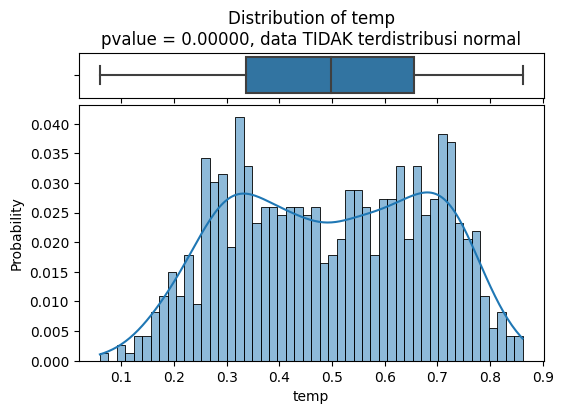

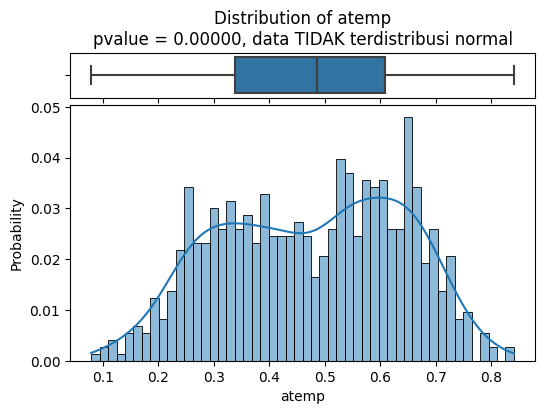

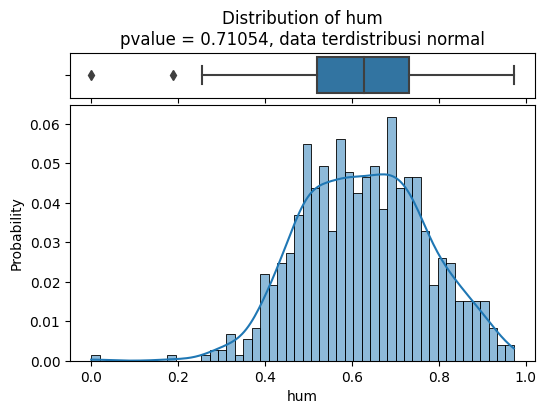

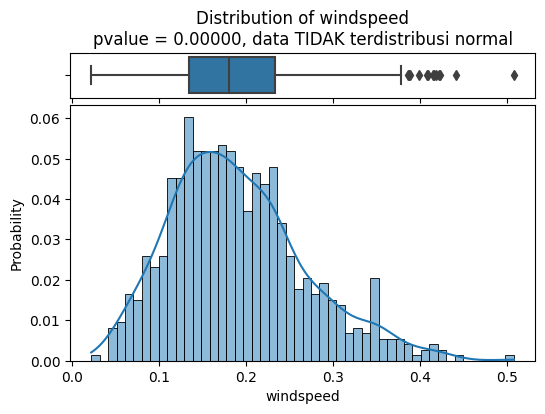

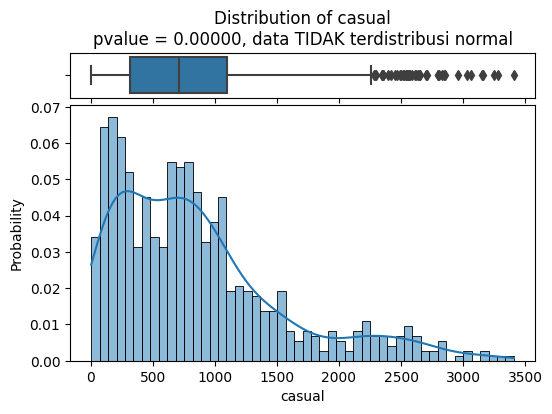

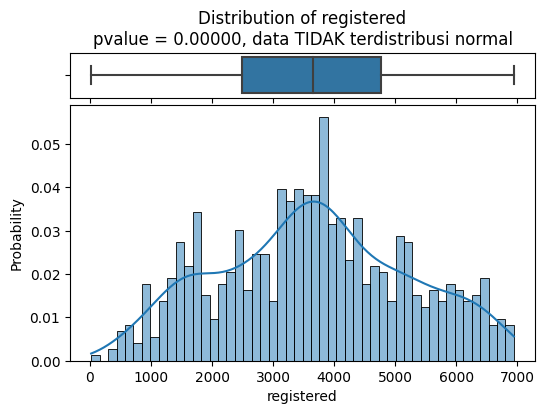

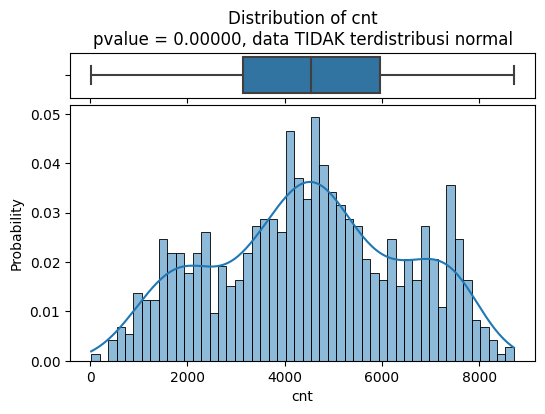

In [224]:
# Melihat Outlier dan Menguji normalitas pada kolom numerikal menggunakan normaltest
for kolom in numerical:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (6,4), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

Dari informasi diatas dapat disimpulkan bahwa : 
1. Tidak terdapat missing value dalam dataset ini
2. Tidak terdapat nilai duplicate dalam data set ini
3. Untuk kolom numerikal continues semua kolomnya tidak terdistribusi secara normal
4. Untuk kolom `casual`,`windspeed` dan `hum` terdapat beberapa nilai outlier 

### **Drop Columns**

Kita akan menghapus kolom instan karena tidak ada relevansi dengan hal yang akan kita analisa

In [225]:
df.drop(columns='instant',inplace=True)

In [226]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **Replace Type Data**

- Kolom `dteday` Merupakan kolom yang yang merepresentasikan waktu oleh karena itu kita akan merubahnya menjadi type data date_time
- Kolom `season`,`mnth`,akan kita ubah menjadi type data text karena kita akan merubah nilai dari unique value nya

In [227]:
# Replace value
df['dteday'] = pd.to_datetime(df['dteday'])
df['season'] = df['season'].astype('object')
df['mnth'] = df['mnth'].astype('object')

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    object        
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8), object(2)
memory usage: 85.8+ 

### **Replace Unique Value**

In [229]:
# Replace unique from yr column
df['yr'] = np.where(df['yr'] == 0,2011,2012)

In [230]:
# Replace Unique Value from season column
df["season"] = df["season"].apply(lambda season: "spring" if season == 1 else "summer" if season == 2 else "fall" if season == 3 else "winter")

In [231]:
# Replace Unique Value from season column
df["mnth"] = df["mnth"].apply(lambda mnth: "January" if mnth == 1 else
                                  "February" if mnth == 2 else
                                  "March" if mnth == 3 else
                                  "April" if mnth == 4 else
                                  "May" if mnth == 5 else
                                  "June" if mnth == 6 else
                                  "July" if mnth == 7 else
                                  "August" if mnth == 8 else
                                  "September" if mnth == 9 else
                                  "October" if mnth == 10 else
                                  "November" if mnth == 11 else
                                  "December")

In [232]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,spring,2011,January,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,spring,2011,January,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,spring,2011,January,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,spring,2011,January,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,spring,2011,January,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## **Exploratory Data Analysis (EDA)**

In [233]:
display(df.describe(),df.describe(include='object'),df.describe(include='all'))

,dteday,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2011.500684,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,2011.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2011.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,2012.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,2012.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,2012.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,0.500342,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


,season,mnth
count,731,731
unique,4,12
top,fall,January
freq,188,62


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,NaN,January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [234]:
df.groupby(by="season").agg({
    "workingday": "count",
    "windspeed": ["max", "min", "mean", lambda x: x.max() - x.min()]  
}).sort_values(by=("workingday", "count"), ascending=False)

workingday windspeed                               
            count       max       min      mean <lambda_0>
season                                                    
fall          188  0.375617  0.064071  0.172095   0.311546
summer        184  0.388067  0.065929  0.203507   0.322138
spring        181  0.507463  0.045408  0.214537   0.462055
winter        178  0.422275  0.022392  0.171995   0.399883

In [235]:
df['season'].value_counts()

season
fall      188
summer    184
spring    181
winter    178
Name: count, dtype: int64

In [236]:
df.groupby('workingday')[['season']].count().reset_index().rename(columns={'season' : 'count'})

,workingday,count
0,0,231
1,1,500


In [237]:
df.groupby('holiday')[['season']].count().reset_index().rename(columns={'season' : 'count'})

,holiday,count
0,0,710
1,1,21


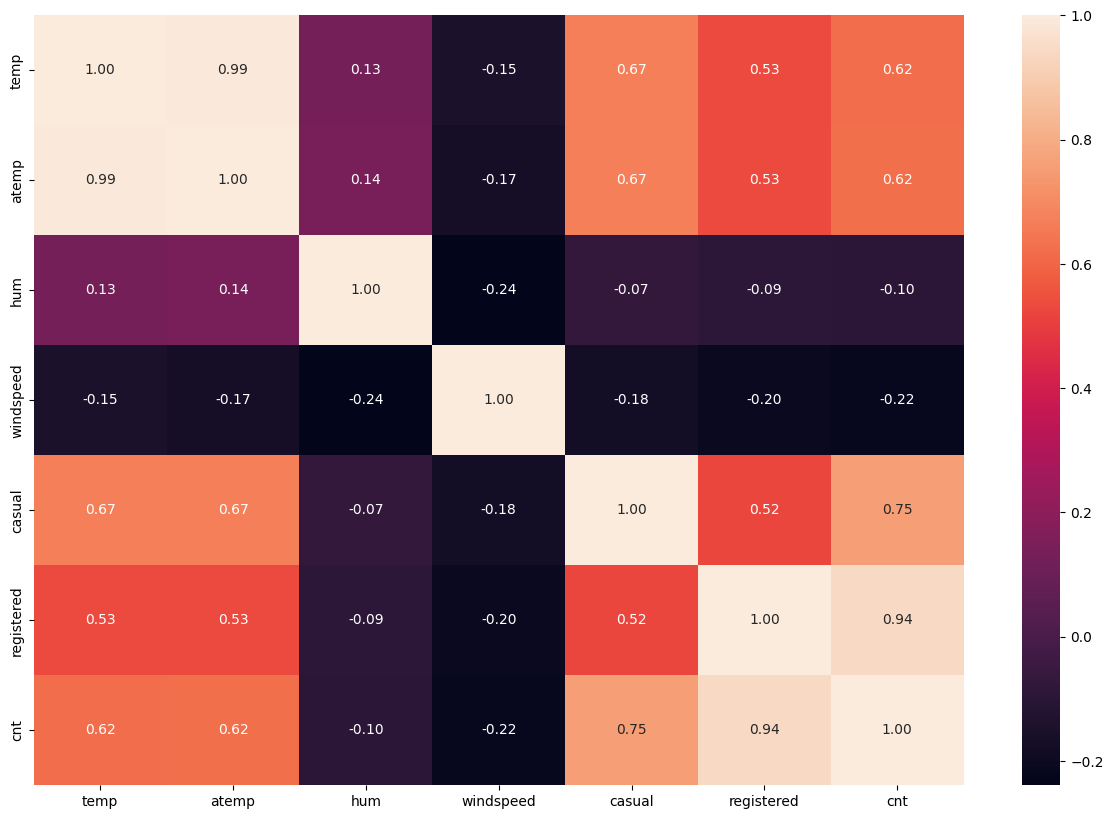

In [238]:
# Melihat correlasi 
plt.figure(figsize=(15,10))

sns.heatmap(data=numerical.corr(method='spearman',numeric_only=True), annot=True, fmt='.2f', cmap='rocket')
plt.show()

## **Visualization & Explanatory Analysis**

1. Berapa banyak total penyewa sepedah berdasarkan musimnya ? 

In [281]:
fig = px.bar(df.groupby('season')[['cnt']].sum().reset_index(),x="season",y='cnt',title="Total penyewa sepeda berdasarkan musim",color='cnt')
fig.show()

2. Bagaimana pengaruh cuaca (weathersit) terhadap jumlah sewa sepeda ?

In [303]:
fig = px.bar(df.groupby('weathersit')[['cnt']].sum().reset_index(),x='cnt',y='weathersit',title='Total penyewa sepeda berdasarkan Weathersit',color='weathersit',orientation='h')
fig.update_yaxes(tickvals=[1, 2, 3,4])
fig.show()

3. Apakah ada perbedaan antara hari kerja (workingday) dan hari libur (holiday) dalam jumlah sewa sepeda harian?

In [244]:
display(px.pie(df,names="workingday",title="Persentase penyewa sepeda by Working Day",hole=0.5,color='cnt'),
px.pie(df,names="holiday",title="Persentase penyewa sepeda by Holdiday",hole=0.5,color='cnt'))

4. Bagaimana peningkatan penyewaan sepeda dalam rentang waktu per 1 tahun ? 

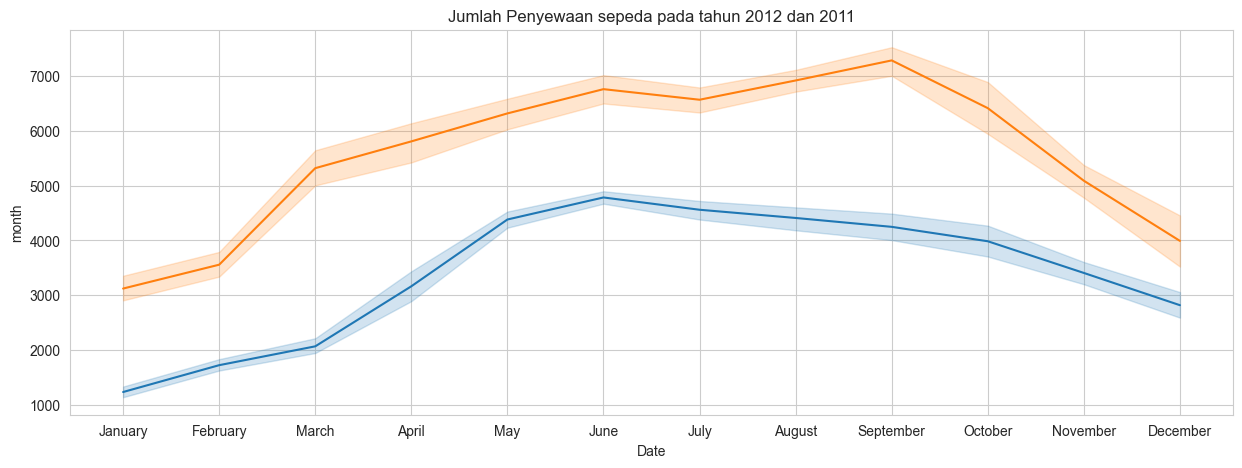

In [302]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.title('Jumlah Penyewaan sepeda pada tahun 2012 dan 2011')
sns.lineplot(data=df[df['yr'] == 2011],x='mnth',y='cnt',ci=85)
sns.lineplot(data=df[df['yr'] == 2012],x='mnth',y='cnt',ci=85)
plt.xlabel('Date')
plt.ylabel('month')
plt.show()

## **Conclusion**

1. Jika kita lihat berdasarkan jumlah penyewa pada setiap musimnya masyarakat cenderung menyewa sepeda pada musim gugur dan musim panas,sedangkan jumlah penyewa paling sedikit ada pada musim semi
2. Berdasarkan Weathersit atau Cuaca Jumlah penyewa banyak jika memiliki cuaca yang Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
3. Masyarakat banyak menggunakan sepeda pada hari kerja jika kita lihat persebarannya berdasarkan working day.
4. Mayoritas masyarakat banyak menggunakan pada hari Holiday juga.
5. Jumlah penyewa sepeda mengalami penginkatan pada tahun 2012,Berdasarkan Lineplot diatas dapat dilihat jumlah penyewa sepeda selama 2011 maupun 2012 memiliki pola yang sama dan ini sesuai dengan hasil analisa kita pada sesuai dengan jumlah penyewa berdasarkan musim.